In [1]:
# 读入数据
# 数据解读页面：https://www.kaggle.com/c/titanic/data

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic-data.csv')

# 显示前5行数据

展示数据的前5行，方便观察数据集。

In [2]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 整理数据

## 观察数据

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Cabin 项缺失内容过多，基本失去参考价值
Age 与 Embarked 的缺失项我选择忽略，这里不进行额外处理，让作图函数自动忽略。

# 提出问题

我感兴趣的问题是，哪些因素会增加乘客的存活率。

## 总体幸存比率

从提供的数据集中看来，总体的幸存率仅为38%。

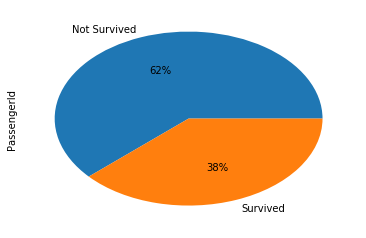

In [20]:
titanic.groupby('Survived')['PassengerId'].count().plot.pie(autopct = '%.0f%%', labels = ['Not Survived', 'Survived'])
plt.show()

## 性别

首先想到的是逃生时，妇女儿童优先的原则，因此分别检验一下。

可以看出，女性存活率明显高于男性，关键时刻绅士们还是靠得住的。

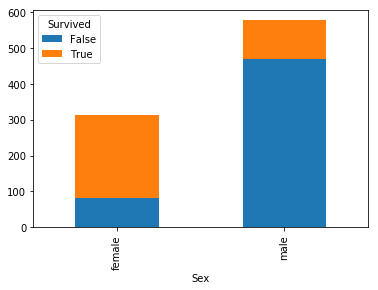

In [25]:
death_sex = pd.crosstab(titanic.Sex, titanic.Survived.astype(bool))
death_sex.plot.bar(stacked=True)

## 年龄

仅从年龄单一属性上来看，似乎没有什么明显的趋势。10岁以下乘客幸存率稍高，而60岁以上稍低。

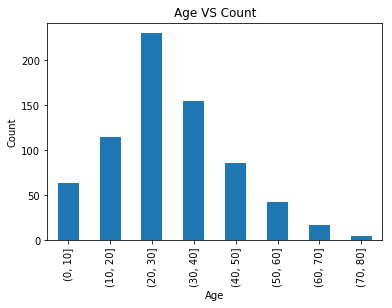

In [16]:
age_not_nan = titanic[~np.isnan(titanic.Age)]

ages = np.arange(0, 90, 10)
age_cut = pd.cut(age_not_nan.Age, ages)
age_cut_grouped = age_not_nan.groupby(age_cut)

# 各年龄区间总人数
df = age_cut_grouped['PassengerId'].count().plot.bar()
plt.title('Age VS Count')
plt.ylabel('Count')
plt.show()

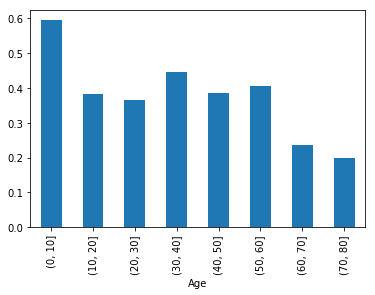

In [17]:
# 各年龄区间幸存率
age_survival_rate = (age_cut_grouped.sum()/age_cut_grouped.count()).Survived
age_survival_rate.plot.bar()

## 舱位

如图，一等舱幸存率明显较高。超过50%，二等舱一半对一半，三等舱则幸存率非常低。

可能有以下原因导致：

1. 头等舱不出意外应该是在最上方。为了舒适性会留出更加宽敞的人均空间，设施完善，而且不会直接撞击到冰山，
2. 三等舱应该是在船体空间最富裕的中部，人均空间小，逃生时极有可能发生堵塞、踩踏、恐慌等等恶性事件。（邮轮会设置客舱在下方么？如果会的话，三等舱很可能会直接受到冰山撞击）

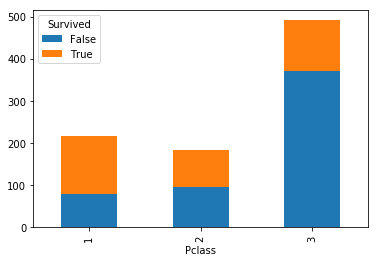

In [24]:
death_pclass = pd.crosstab(titanic.Pclass, titanic.Survived.astype(bool))
death_pclass.plot.bar(stacked=True)

## 兄弟姐妹以及配偶数量

出乎意料，是否有兄弟姐妹或配偶陪伴是一个相当重要的指标，没有配偶的旅客存活率基本只有三分之一，而有一个的幸存率则超过一半。

猜测原因可能是兄弟姐妹以及配偶之间的互相帮助，多个人之间只要有一个头脑清醒能够做出正确决策，就能大幅增加其他人的幸存几率。

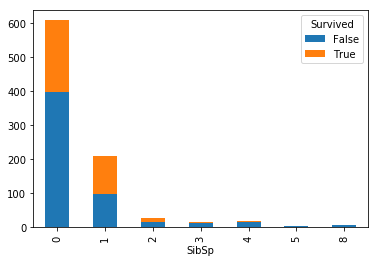

In [23]:
death_sibsp = pd.crosstab(titanic.SibSp, titanic.Survived.astype(bool))
death_sibsp.plot.bar(stacked=True)

## 子女／父母数量

与上一条参数的图形非常相似！看来亲情爱情在遭遇灾难的时候确实都能帮助人们求生。

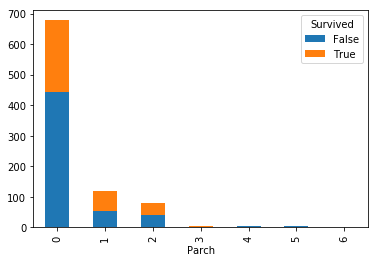

In [22]:
death_parch = pd.crosstab(titanic.Parch, titanic.Survived.astype(bool))
death_parch.plot.bar(stacked=True)

## 登船港口

Cherbourg 港最为特殊，幸存率超过一半。但从资料里没看出来什么原因导致的这一点。这应该不是一个直接因素，有可能是因为某个港口较富裕，乘客大多购买高等级舱位之类的间接原因导致。

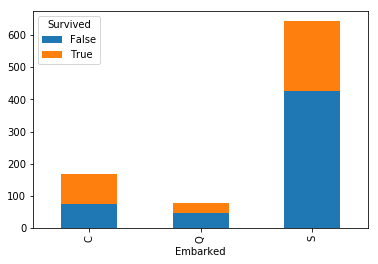

In [21]:
death_embarked = pd.crosstab(titanic.Embarked, titanic.Survived.astype(bool))
death_embarked.plot.bar(stacked=True)

# 结论

通过探索数据，我发现以下因素对幸存率影响明显：

1. 舱位等级（Pclass）：舱位等级与幸存率关系明显，三等舱的死亡率极高，而一等舱幸存率则超过百分之五十。
2. 性别（Sex）：性别与幸存率关系非常明显，女性的幸存率远远高于男性。
3. 随行人数（SibSp／Parch）：有一两个随行的人，亲属、夫妻等也可以提升幸存率，出游时带上一两个玩伴不仅仅是心理上有安全感，也能在实际上提高幸存率。
4. 登船港口（Embarked）：尽管不同港口间呈现出了较明显的幸存率差异，但我没能找到一个明确的解释。

其它因素，如 ticket，fare（与舱位等级相关），cabin（缺失内容过多）以及 age 对幸存率影响不甚明显，或者没有直接相关。

泰坦尼克号上的乘客以及船员总数为2224名，本报告中使用的数据包含了其中891名。该样本占了总体的一小半，如果是随机选取的话，可以认为它能够很好的代表总体情况。若样本是刻意隐藏了部分数据或随机效果较差，本文的结论将可能会失效。

我直接忽略了 Cabin 数据，但应该影响不大，因为 Cabin 缺失实在太过严重了。

Embarked 仅缺失两个数据，直接忽略完全可以接受。

Age 数据缺失较多，但没有找到一个合理的方式去填补。若有更多的信息的话，可以尝试猜测缺失项所处年龄区间。但这种猜测会带有主观色彩，可能反而影响结果的正确性。所以，如果丢失的 Age 数据大部分较为集中的话，以忽略它为前提得出的结论很可能会有较大偏差。

另外我比较关心但数据集中没有体现的还有是否是船员的数据。这是登船人员之间一个非常重要的区分条件，我认为它很可能会导致明显的幸存率差别。